In [1]:
%matplotlib inline

import gensim
import json
import logging
import math
import os
import random
import re
import spacy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyLDAvis.gensim_models
import warnings

from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.test.utils import datapath

from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.preprocessing import normalize

from stop_words import get_stop_words
from wordcloud import WordCloud

In [2]:
with open(os.path.join('posts_maior_propre.json'), 'r', encoding = 'UTF-8') as fin_M2 :
    data = json.load(fin_M2)

In [3]:
index = ''
a = ''
list_clean_content = []

for j in range(len(data)) :
    index = data[j]
    a = index.replace( "\n", "")
    list_clean_content.append(a)

In [4]:
sp_stop_words = get_stop_words('spanish')
fr_stop_words = get_stop_words('french')
en_stop_words = get_stop_words('english')

In [5]:
words = [ 'plus', 'rien', 'tres', 'ca', 'fr', 'com', 'www', 'http',
          'etais', 'etait', 'etaient', 'meme', 'non', 'bien', 'oui', 'quoi',
          'chez', 'va', 'apres']

In [6]:
stop_words = sp_stop_words + fr_stop_words + en_stop_words + words 

In [7]:
# fonction qui génère les listes de mots (token) à partir des textes
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# on construit le corpus
doc_set =  list_clean_content
data_words = list(sent_to_words(list_clean_content))

In [8]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# on retire les mots-outils
data_words_nostops = remove_stopwords(data_words)

In [9]:
# création du dictionnaire
dico = corpora.Dictionary(data_words_nostops)

### Filtering rare and extreme vocabulary ### 
dico.filter_extremes( no_below = 5, no_above = 0.5)

# Create Corpus
texts = data_words_nostops

# matrice Term Document Frequency
corpus = [dico.doc2bow(text) for text in texts]

In [10]:
# ldamodel = LdaModel(corpus,
#                     id2word = dico,
#                     num_topics=35, 
#                     passes=2, 
#                     random_state=100, 
#                     per_word_topics=True)

In [11]:
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(ldamodel, gensim.matutils.corpus2csc(corpus), dictionary=ldamodel.id2word)
# pyLDAvis.display(vis)

In [12]:
ldamodel = LdaModel(corpus,
                    id2word = dico,
                    num_topics=40, 
                    passes=2, 
                    random_state=100, 
                    per_word_topics=True)

In [13]:
ldamodel.show_topics(num_topics=40,formatted=False)

[(0,
  [('livre', 0.034121916),
   ('livres', 0.01553388),
   ('auteur', 0.015279034),
   ('roman', 0.014343859),
   ('litterature', 0.010936283),
   ('lecture', 0.010420973),
   ('lire', 0.010331212),
   ('texte', 0.01014912),
   ('pages', 0.00894121),
   ('ecrivain', 0.008385267)]),
 (1,
  [('diaz', 0.032155924),
   ('louis', 0.0292477),
   ('charles', 0.02519921),
   ('stand', 0.022952698),
   ('tom', 0.018226856),
   ('levy', 0.015777001),
   ('san', 0.015090115),
   ('roger', 0.01492492),
   ('attila', 0.013975215),
   ('jack', 0.013462964)]),
 (2,
  [('histoire', 0.011861814),
   ('dont', 0.009183084),
   ('roman', 0.008635702),
   ('monde', 0.00858357),
   ('vie', 0.006770401),
   ('celle', 0.006596657),
   ('etre', 0.0056457208),
   ('recit', 0.0053094453),
   ('personnages', 0.005009459),
   ('ainsi', 0.004427648)]),
 (3,
  [('jeanne', 0.027373096),
   ('beckett', 0.025419978),
   ('arnaud', 0.024595918),
   ('alexandre', 0.023680493),
   ('didier', 0.023385003),
   ('raymond'

In [14]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, gensim.matutils.corpus2csc(corpus), dictionary=ldamodel.id2word)
pyLDAvis.display(vis)

C:\Users\filip\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [15]:
ldc = ldamodel[corpus]

In [16]:
# bigram = gensim.models.Phrases( data_words, min_count = 5, threshold = 100)
# bigram_mod = gensim.models.phrases.Phraser(bigram)

# def make_bigrams(texts):
#     return [bigram_mod[doc] for doc in texts]

# data_words_bigrams = make_bigrams(data_words_nostops)

In [17]:
## création du dictionnaire
# dico_bi = corpora.Dictionary(data_words_bigrams)

### Filtering rare and extreme vocabulary ###
# dico_bi.filter_extremes( no_below = 10)

# Create Corpus
# texts = data_words_bigrams

# matrice Term Document Frequency
# corpus = [dico_bi.doc2bow(text) for text in texts]

In [18]:
# nlp = spacy.load('fr_core_news_sm')

In [19]:
model = Word2Vec( sentences = data_words_nostops, vector_size = 2, window = 5, min_count=1, workers=4)
# model.save("lda-filippo-projet.model")

In [20]:
words = model.wv

In [21]:
df = pd.DataFrame(words.vectors,columns=['v1','v2'],index=words.key_to_index.keys())
print(df)
# si tu arrive à mettre tout cela, mais en 3d dans un fichier tu pourras le visualiser sur word embedding projector?

                       v1        v2
etre             4.193152  7.681810
temps            3.795176  5.791786
vie              3.755494  6.406743
monde            3.819860  6.353476
etc              3.297745  2.842353
...                   ...       ...
isobare         -0.228445  0.171659
preferesjepeux   0.202135  0.228044
webcamc         -0.153360  0.002686
messageps        0.245761 -0.418858
desboulangeries  0.249761 -0.280279

[743643 rows x 2 columns]


In [22]:
mots = [ 'etre', 'monde', 'vie', 'temps', 'question', 'reponse', 'poesie', 'roman', 
         'solitude', 'existence', 'souffrance', 'enfance', 'sexualite', 'doute', 'mort']
dfmots = df.loc[mots,:]
print(dfmots)

                  v1        v2
etre        4.193152  7.681810
monde       3.819860  6.353476
vie         3.755494  6.406743
temps       3.795176  5.791786
question    3.971453  7.066931
reponse     3.835485  5.972613
poesie      3.728985  3.650910
roman       3.771824  4.028514
solitude    3.499138  4.997163
existence   3.664329  7.592250
souffrance  3.639811  7.140988
enfance     3.688924  3.966436
sexualite   2.726141  4.574960
doute       3.764145  6.965767
mort        3.672255  3.642030


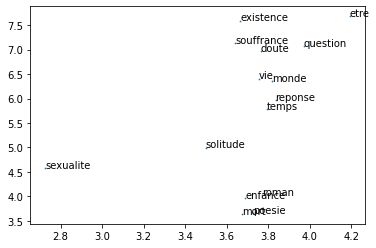

In [23]:
plt.scatter( dfmots.v1, dfmots.v2, s = 0.5)
for i in range(dfmots.shape[0]):
    plt.annotate( dfmots.index[i], (dfmots.v1[i],dfmots.v2[i]))

In [24]:
words.similarity('roman','river')

0.38169995

In [25]:
words.similarity('vie','souffrance')

0.9982711

In [26]:
doc_set = list_clean_content[:10]

In [27]:
# def format_topics_sentences(ldamodel, corpus, texts):
#     # Init output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     i=0
#     for i, row in enumerate(ldamodel[corpus]):
#         #print(row[0])            
#         row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
#         #print(row)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

#     # Add original text to the end of the output
#     contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     return(sent_topics_df)


# df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=doc_set)

# # Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# # Show
# df_dominant_topic.head(10)

In [28]:
# sent_topics_sorteddf = pd.DataFrame()

# sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

# for i, grp in sent_topics_outdf_grpd:
#     sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
#                                              grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
#                                             axis=0)

# # Reset Index    
# sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# # Format
# sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# # Show
# sent_topics_sorteddf

In [29]:
# # Number of Documents for Each Topic
# topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
# topic_counts